In [28]:
#import all librares to per operations
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;


In [29]:
#1.	Import all marketing data
#Load CSV file
marketingdf = pd.read_csv('marketing_data.csv');
#Display few records of marketingdf
marketingdf.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [30]:
#1.	After importing the data, examine variables such as Dt_Customer and Income to verify their accurate importation.
marketingdf[['Dt_Customer', 'Income']].head()

,Dt_Customer,Income
0,6/16/14,"$84,835.00"
1,6/15/14,"$57,091.00"
2,5/13/14,"$67,267.00"
3,5/11/14,"$32,474.00"
4,4/8/14,"$21,474.00"


In [31]:
#2.	There are missing income values for some customers.
#Conduct missing value imputation, considering that customers with similar education and marital status tend to have comparable yearly incomes, on average.
#It may be necessary to cleanse the data before proceeding. Specifically, scrutinize the categories of education and marital status for data cleaning.

In [32]:
# 2.1 Clean the Income column by removing currency symbols and converting to numeric
marketingdf['Income'] = marketingdf['Income'].replace('[\$,]', '', regex=True).astype(float)

In [33]:
# Check for missing values in Income column
missing_income = marketingdf[marketingdf['Income'].isnull()]
print("\nRows with missing Income values:")
print(missing_income)
# Impute missing Income values based on Education and Marital_Status
marketingdf['Income'] = marketingdf.groupby(['Education', 'Marital_Status'])['Income'].transform(lambda x: x.fillna(x.mean()))




Rows with missing Income values:
         ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
134    8996        1957         PhD        Married     NaN        2         1   
262    1994        1983  Graduation        Married     NaN        1         0   
394    3769        1972         PhD       Together     NaN        1         0   
449    5255        1986  Graduation         Single     NaN        1         0   
525    8268        1961         PhD        Married     NaN        0         1   
590   10629        1973    2n Cycle        Married     NaN        1         0   
899   10475        1970      Master       Together     NaN        0         1   
997    9235        1957  Graduation         Single     NaN        1         1   
1096   4345        1964    2n Cycle         Single     NaN        1         1   
1185   7187        1969      Master       Together     NaN        1         1   
1213   8720        1978    2n Cycle       Together     NaN        0        

In [34]:
#2.2 Convert the 'Dt_Customer' column to datetime format. If any invalid values exist, they should be coerced into NaT.

marketingdf['Dt_Customer'] = pd.to_datetime(marketingdf['Dt_Customer'], errors='coerce')

<ipython-input-34-139e7e106179>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketingdf['Dt_Customer'] = pd.to_datetime(marketingdf['Dt_Customer'], errors='coerce')


In [35]:
#2.3 Scrutinized the Categories of Education and Marital Status:
from sklearn.preprocessing import OrdinalEncoder

#The below list must be in ascending order of rank
educationOrder = ["Basic", "2n Cycle", "Graduation", "Master","PhD"]

encoder = OrdinalEncoder(categories=[educationOrder])

marketingdf['Education_Encoded'] = encoder.fit_transform(marketingdf[['Education']])

#The below list must be in ascending order of rank
marriageOrder = ["Single", "Alone", "Absurd", "Together","Married","Divorced","Widow","YOLO"]

encoder = OrdinalEncoder(categories=[marriageOrder])

marketingdf['Marriage_Encoded'] = encoder.fit_transform(marketingdf[['Marital_Status']])
#Remove education and Marital Status columnfrom DF and addEducation_Encoded2 and Marriage_Encoded2
#marketingdf.drop(['Education', 'Marital_Status'], axis=1, inplace=True)
marketingdf

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Education_Encoded,Marriage_Encoded
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,0,1,0,SP,2.0,5.0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,0,1,1,0,CA,2.0,0.0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,0,US,2.0,4.0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,0,AUS,2.0,3.0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,1,0,0,0,0,1,0,SP,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,...,0,0,0,0,0,0,0,US,4.0,5.0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0,0,0,0,0,0,0,SP,1.0,4.0
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,...,0,0,0,0,0,0,0,SP,2.0,5.0
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,0,0,0,0,0,0,0,IND,2.0,4.0


In [36]:
# Step 3: Create variables to represent the total number of children, age, and total spending
## Create a variable for the total number of children
from datetime import datetime
marketingdf['Total_Children'] = marketingdf['Kidhome'] + marketingdf['Teenhome']
# Create a variable for age
current_year = datetime.now().year
marketingdf['Age'] = current_year - marketingdf['Year_Birth']
# Create a variable for total spending
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
marketingdf['Total_Spending'] = marketingdf[spending_columns].sum(axis=1)

#marketingdf['Total_Spending'] = marketingdf[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
#a.	Derive the total purchases from the number of transactions across the three channels.
purchaces_columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
marketingdf['Total_Purchases'] = marketingdf[purchaces_columns].sum(axis=1)

#marketingdf.head()
marketingdf[['Total_Children','Age', 'Total_Spending','Total_Purchases']].head()


,Total_Children,Age,Total_Spending,Total_Purchases
0,0,55,1190,15
1,0,64,577,18
2,1,67,251,11
3,2,58,11,4
4,1,36,91,8


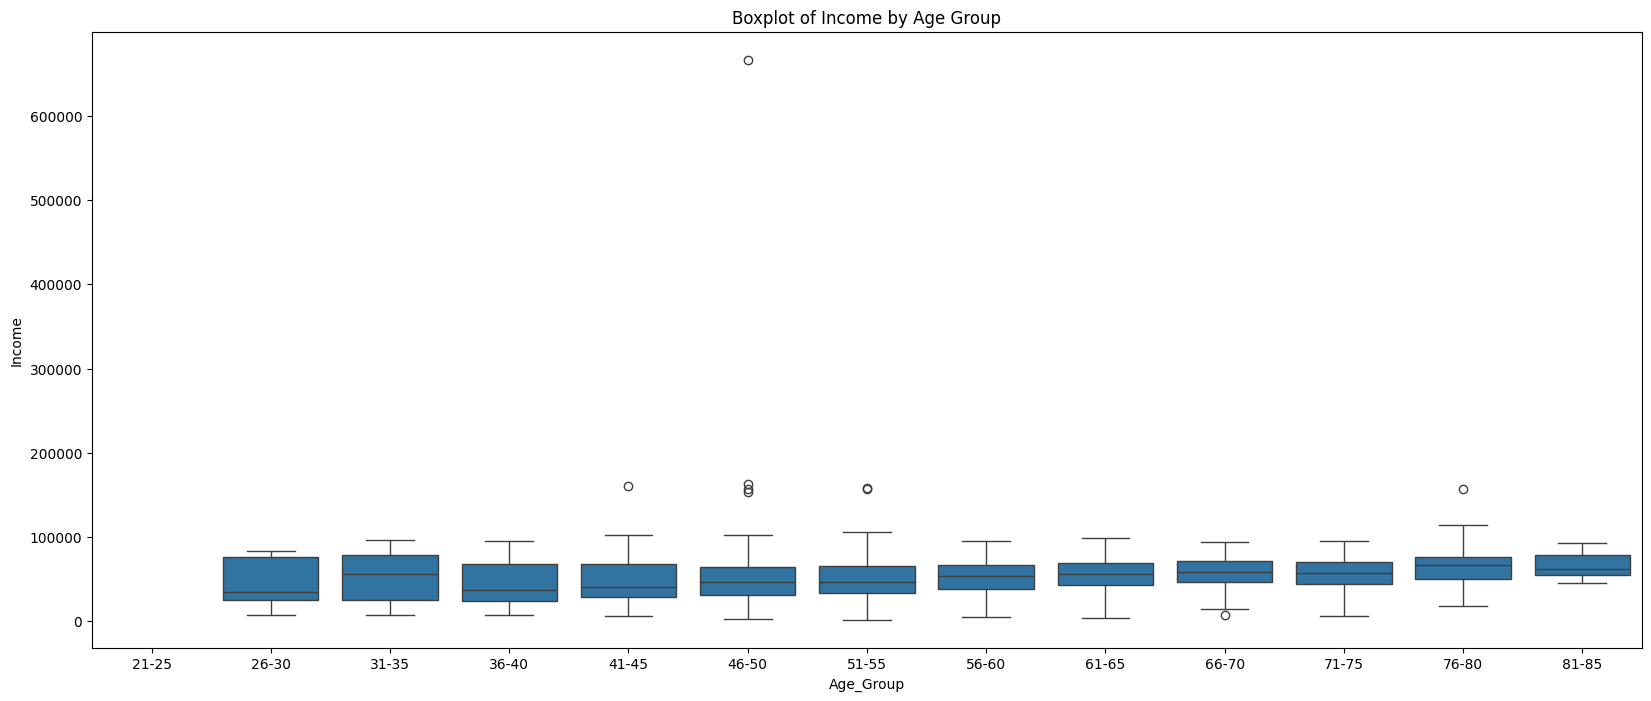

In [37]:
#4.	Generate box plots and histograms to gain insights into the distributions and identify outliers. Implement outlier treatment as needed.
#: Create a boxplot to visualize the distribution of 'Income' across different 'Age' categories.
#: Create a boxplot to visualize the distribution of 'Total_Spedings' across different 'Age' categories.
#: Create a boxplot to visualize the distribution of 'Total prchases' across different 'Age' categories.


# Draw a vertical boxplot grouped
# by a categorical variable:

# Define the bins for age groups (1-5, 6-10, ..., 96-100)
bins = range(21, 90, 5)  # This creates bins from 0 to 100 in steps of 5
labels = [f"{i}-{i+4}" for i in bins[:-1]]  # Create labels like '1-5', '6-10', ..., '96-100'

# Create the new age group column
marketingdf['Age_Group'] = pd.cut(marketingdf['Age'], bins=bins, right=False, labels=labels)

plt.figure(figsize=(20, 8))
pl = sns.boxplot(x='Age_Group', y='Income', data=marketingdf)
plt.title('Boxplot of Income by Age Group')
plt.ylim()
plt.show()
#Asper observatios outliers are present








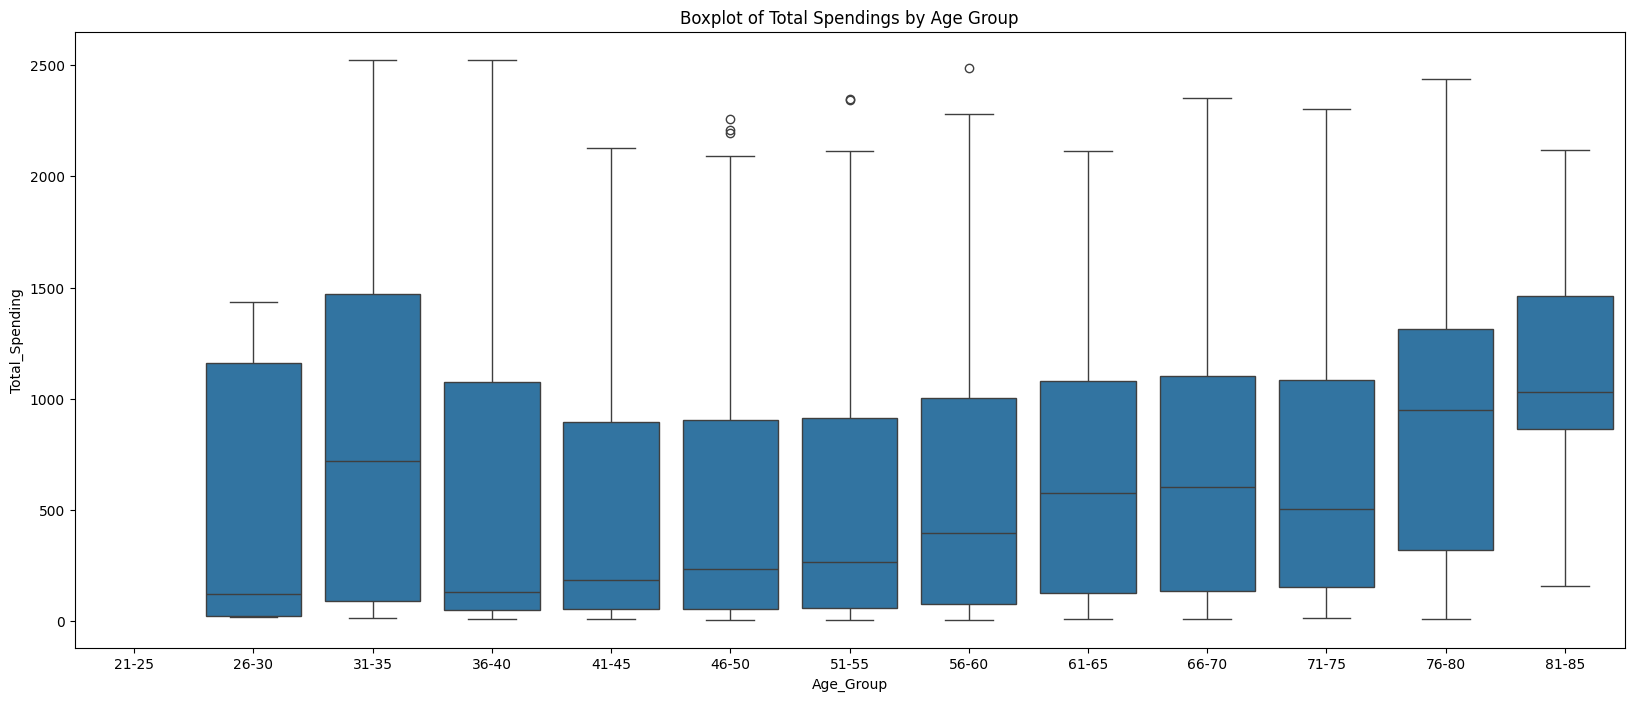

In [38]:
#4.	Generate box plots and histograms to gain insights into the distributions and identify outliers. Implement outlier treatment as needed.
#: Create a boxplot to visualize the distribution of 'Total_Spedings' across different 'Age' categories.

# Draw a vertical boxplot grouped
# by a categorical variable:

# Define the bins for age groups (1-5, 6-10, ..., 96-100)
bins = range(21, 90, 5)  # This creates bins from 0 to 100 in steps of 5
labels = [f"{i}-{i+4}" for i in bins[:-1]]  # Create labels like '1-5', '6-10', ..., '96-100'

# Create the new age group column
marketingdf['Age_Group'] = pd.cut(marketingdf['Age'], bins=bins, right=False, labels=labels)

plt.figure(figsize=(20, 8))
pl = sns.boxplot(x='Age_Group', y='Total_Spending', data=marketingdf)
plt.title('Boxplot of Total Spendings by Age Group')
plt.ylim()
plt.show()
#Asper observatios outliers are present








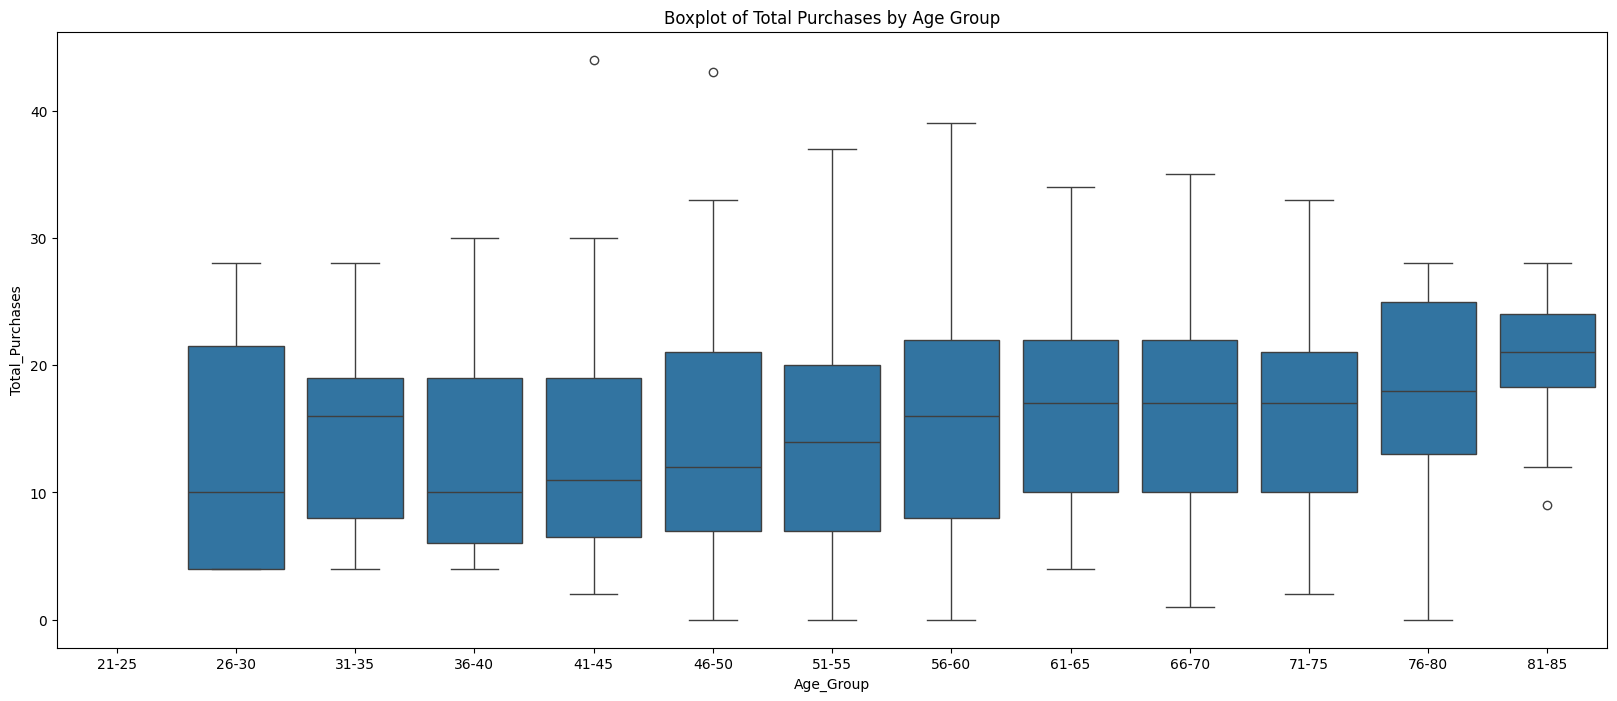

In [39]:
#4.	Generate box plots and histograms to gain insights into the distributions and identify outliers. Implement outlier treatment as needed.

#: Create a boxplot to visualize the distribution of 'Total prchases' across different 'Age' categories.


# Draw a vertical boxplot grouped
# by a categorical variable:

# Define the bins for age groups (1-5, 6-10, ..., 96-100)
bins = range(21, 90, 5)  # This creates bins from 0 to 100 in steps of 5
labels = [f"{i}-{i+4}" for i in bins[:-1]]  # Create labels like '1-5', '6-10', ..., '96-100'

# Create the new age group column
marketingdf['Age_Group'] = pd.cut(marketingdf['Age'], bins=bins, right=False, labels=labels)

plt.figure(figsize=(20, 8))
pl = sns.boxplot(x='Age_Group', y='Total_Purchases', data=marketingdf)
plt.title('Boxplot of Total Purchases by Age Group')
plt.ylim()
plt.show()
#Asper observatios outliers are present








,Age
0,49


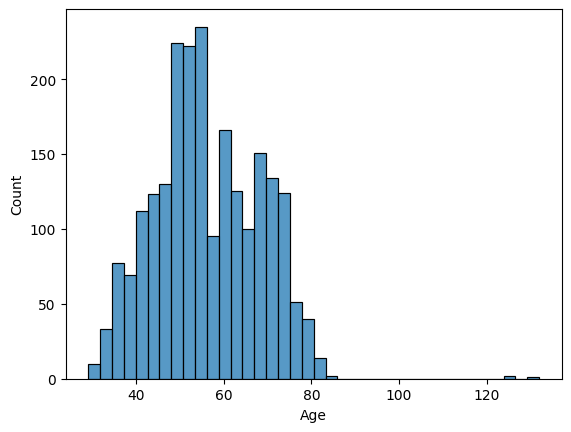

In [40]:
#4.	Generate histograms to gain insights into the distributions and identify outliers. Implement outlier treatment as needed.

sns.histplot(data = marketingdf, x='Age')
#What is the range of ages, and what is the mode?
marketingdf['Age'].describe()
marketingdf['Age'].mode()

,Income
0,7500.0


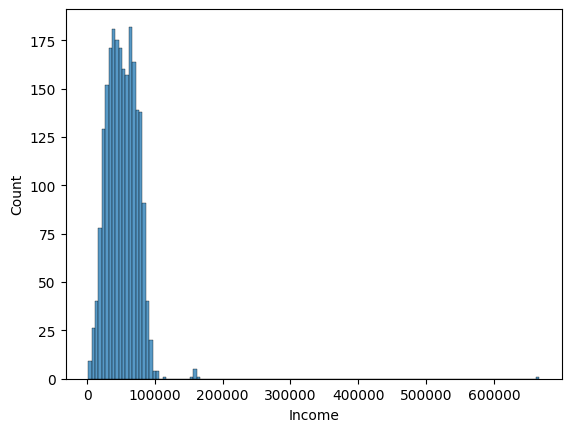

In [42]:
#Plot a Histo gram
sns.histplot(data = marketingdf, x='Income')
#What is the range of ages, and what is the mode?
marketingdf['Income'].describe()
marketingdf['Income'].mode()



In [ ]:
#Thereis describe method we can sue to identify outliers.where mean and 50% are not same then it seems outliers are present
marketingdf['Income'].describe()
marketingdf['Age'].describe()
marketingdf['Total_Spending'].describe()
marketingdf['Total_Purchases'].describe()

In [43]:
#Goal: Identify th extreme values and remove the same
# To identify the extreme value we need to identify the range
# To identify the range, we will use 1.5 IQR Rule

def outlierDetection(column):
  #1. Sort the data in ascending order
  sorted(column)
  #2. Calc Q1 and Q3
  Q1,Q3 = np.percentile(column, [25,75])

  #3.Calc IQR
  IQR = Q3 - Q1

  #4. Calc valid range
  lowerRange = Q1 - (1.5 * IQR)
  upperRange = Q3 + (1.5 * IQR)

  return lowerRange,upperRange

In [44]:
#Identiy Outlier for Income
lr,ur = outlierDetection(marketingdf['Income'])
#Delete Outliers
marketingdf = marketingdf[ (marketingdf['Income'] >= lr) & (marketingdf['Income'] <= ur) ]

#Identiy Outlier for Total_Spending
lr,ur = outlierDetection(marketingdf['Total_Spending'])
#Delete Outliers
marketingdf = marketingdf[ (marketingdf['Total_Spending'] >= lr) & (marketingdf['Total_Spending'] <= ur) ]

#Identiy Outlier for Age
lr,ur = outlierDetection(marketingdf['Age'])
#Delete Outliers
marketingdf = marketingdf[ (marketingdf['Age'] >= lr) & (marketingdf['Age'] <= ur) ]

#Identiy Outlier for Total_Purchases
lr,ur = outlierDetection(marketingdf['Total_Purchases'])
#Delete Outliers
marketingdf = marketingdf[ (marketingdf['Total_Purchases'] >= lr) & (marketingdf['Total_Purchases'] <= ur) ]
#After deleting outliers mean and 50% is same might there is slight difference


In [45]:
#5.	Apply ordinal and one-hot encoding based on the various types of categorical variables.
marketingdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2225 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2225 non-null   int64         
 1   Year_Birth           2225 non-null   int64         
 2   Education            2225 non-null   object        
 3   Marital_Status       2225 non-null   object        
 4   Income               2225 non-null   float64       
 5   Kidhome              2225 non-null   int64         
 6   Teenhome             2225 non-null   int64         
 7   Dt_Customer          2225 non-null   datetime64[ns]
 8   Recency              2225 non-null   int64         
 9   MntWines             2225 non-null   int64         
 10  MntFruits            2225 non-null   int64         
 11  MntMeatProducts      2225 non-null   int64         
 12  MntFishProducts      2225 non-null   int64         
 13  MntSweetProducts     2225 non-null   i

In [46]:
#5.	Apply ordinal and one-hot encoding based on the various types of categorical variables.

from sklearn.preprocessing import OrdinalEncoder

#The below list must be in ascending order of rank
educationOrder = ["Basic", "2n Cycle", "Graduation", "Master","PhD"]

encoder = OrdinalEncoder(categories=[educationOrder])

marketingdf['Education_Encoded2'] = encoder.fit_transform(marketingdf[['Education']])

#The below list must be in ascending order of rank
marriageOrder = ["Single", "Alone", "Absurd", "Together","Married","Divorced","Widow","YOLO"]

encoder = OrdinalEncoder(categories=[marriageOrder])

marketingdf['Marriage_Encoded2'] = encoder.fit_transform(marketingdf[['Marital_Status']])
#Remove education and Marital Status columnfrom DF and addEducation_Encoded2 and Marriage_Encoded2
#marketingdf.drop(['Education', 'Marital_Status'], axis=1, inplace=True)
marketingdf.head()




,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Country,Education_Encoded,Marriage_Encoded,Total_Children,Age,Total_Spending,Total_Purchases,Age_Group,Education_Encoded2,Marriage_Encoded2
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,SP,2.0,5.0,0,55,1190,15,51-55,2.0,5.0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,CA,2.0,0.0,0,64,577,18,61-65,2.0,0.0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,US,2.0,4.0,1,67,251,11,66-70,2.0,4.0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,AUS,2.0,3.0,2,58,11,4,56-60,2.0,3.0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,SP,2.0,0.0,1,36,91,8,36-40,2.0,0.0


<Axes: >

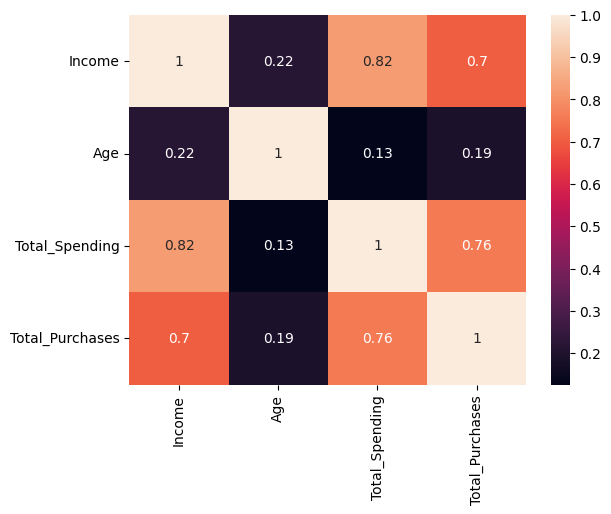

In [47]:
#6.	Generate a heatmap to illustrate the correlation between different pairs of variables.
marketingdf[['Income', 'Age','Total_Spending', 'Total_Purchases']].corr()
#Correlation Matrix
sns.heatmap(marketingdf[['Income', 'Age','Total_Spending', 'Total_Purchases']].corr(), annot=True)



In [ ]:
#7.	Test the following hypotheses:
#a.	Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.
#b.	Customers with children likely experience time constraints, making online shopping a more convenient option.
#c.	Sales at physical stores may face the risk of cannibalization by alternative distribution channels.
#d.	Does the United States significantly outperform the rest of the world in total purchase volumes?


In [48]:
# Goal: Older individuals may prefer in-store shopping
#
# 2. Convert the question into Hypothesis (H0 and Ha)
#
#  Null Hypothesis (H0) --- Older individuals may NOT prefer in-store shopping
#  Alt  Hypothesis (H1) --- Older individuals may prefer in-store shopping
#
# 3. Select the statistical test to validate the hypothesis (Who wins?)
#
#   Normality Test ---- Shapiro Test
#
# 4. Select/Determine the SL of the project
#
#  SL = 0.05
#
# 5. Calc the pvalue and compare the same with the SL to determine who Wins

#Goal : Older individuals may prefer in-store shopping
SL = 0.05

from scipy.stats import shapiro

w_statistic,pvalue = shapiro(marketingdf['Age']>50)

if pvalue >= SL:
  print("Alt  Hypothesis (H1) --- Older individuals prefer in-store shopping")
  print(w_statistic,pvalue)
else:
  print("Null Hypothesis (H0) --- Older individuals NOT prefer in-store shopping")
  print(w_statistic,pvalue)

#Goal :  Customers with children may prefer online shopping
SL = 0.05

from scipy.stats import shapiro

w_statistic,pvalue = shapiro(marketingdf['Total_Children']>1)

if pvalue >= SL:
  print("Alt  Hypothesis (H1) --- Customers with children may prefer online shopping")
  print(w_statistic,pvalue)
else:
  print("Null Hypothesis (H0) --- Customers with children mayNOT prefer online shopping")
  print(w_statistic,pvalue)

#Goal : Sales at physical stores at the risk of cannibalization .
SL = 0.05

from scipy.stats import shapiro

w_statistic,pvalue = shapiro(marketingdf['Total_Spending']>1)

if pvalue >= SL:
  print("Alt  Hypothesis (H1) --- Sales at physical stores at the risk of cannibalization")
  print(w_statistic,pvalue)
else:
  print("Null Hypothesis (H0) --- Sales at physical stores are not  the risk of cannibalization")
  print(w_statistic,pvalue)

#Goal :  United States perform rest of the world  total purchase volumes
SL = 0.05

from scipy.stats import shapiro

w_statistic,pvalue = shapiro(marketingdf['Total_Purchases']>1)

if pvalue >= SL:
  print("Alt  Hypothesis (H1) --- United States perform rest of the world  total purchase volumes")
  print(w_statistic,pvalue)
else:
  print("Null Hypothesis (H0) --- United States does not perform rest of the world  total purchase volumes")
  print(w_statistic,pvalue)

Null Hypothesis (H0) --- Older individuals NOT prefer in-store shopping
0.6009966244780159 9.293985413234798e-58
Null Hypothesis (H0) --- Customers with children mayNOT prefer online shopping
0.5033219157702935 1.0130057313850197e-61
Alt  Hypothesis (H1) --- Sales at physical stores at the risk of cannibalization
1.0 1.0
Null Hypothesis (H0) --- United States does not perform rest of the world  total purchase volumes
0.022327963097457992 7.829145135904024e-75


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [49]:
#8.	Use appropriate visualization to help analyze the following:
#a.	Identify the top-performing products and those with the lowest revenue.
#b.	Examine if there is a correlation between customers' age and the acceptance rate of the last campaign.
#c.	Determine the country with the highest number of customers who accepted the last campaign.
#d.	Investigate if there is a discernible pattern in the number of children at home and the total expenditure.
#e.	Analyze the educational background of customers who lodged complaints in the last two years.


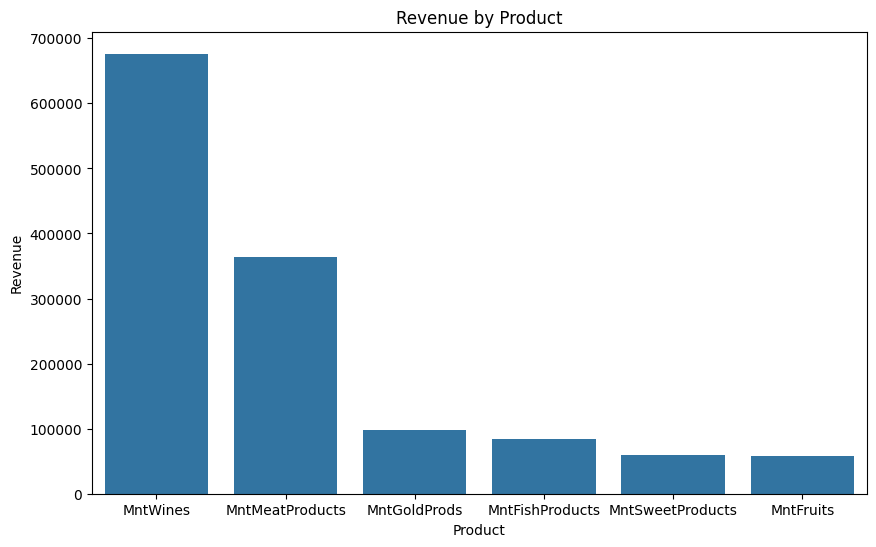

In [50]:
# a. Identify the top-performing products and those with the lowest revenue
product_revenue = marketingdf[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
top_performing_products = product_revenue.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_performing_products.index, y=top_performing_products.values)
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.show()

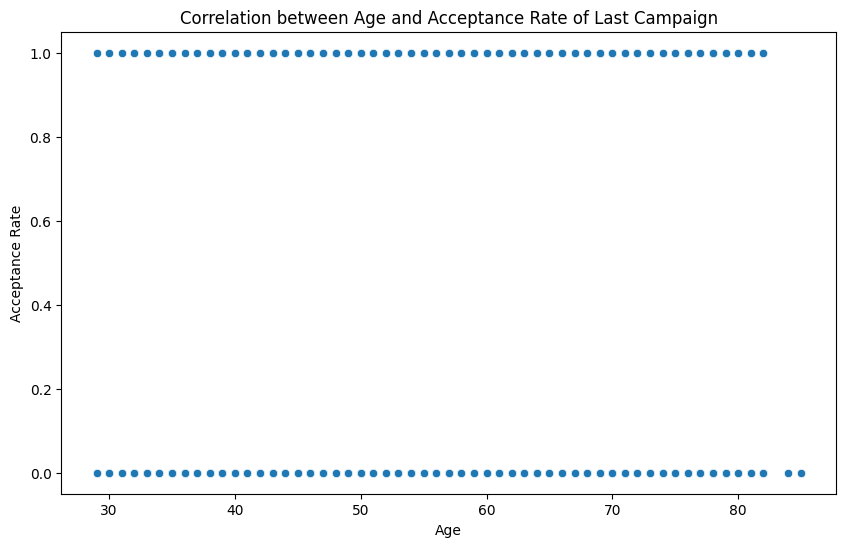

In [51]:
#b.	Examine if there is a correlation between customers' age and the acceptance rate of the last campaign.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Response', data=marketingdf)
plt.title('Correlation between Age and Acceptance Rate of Last Campaign')
plt.xlabel('Age')
plt.ylabel('Acceptance Rate')
plt.show()


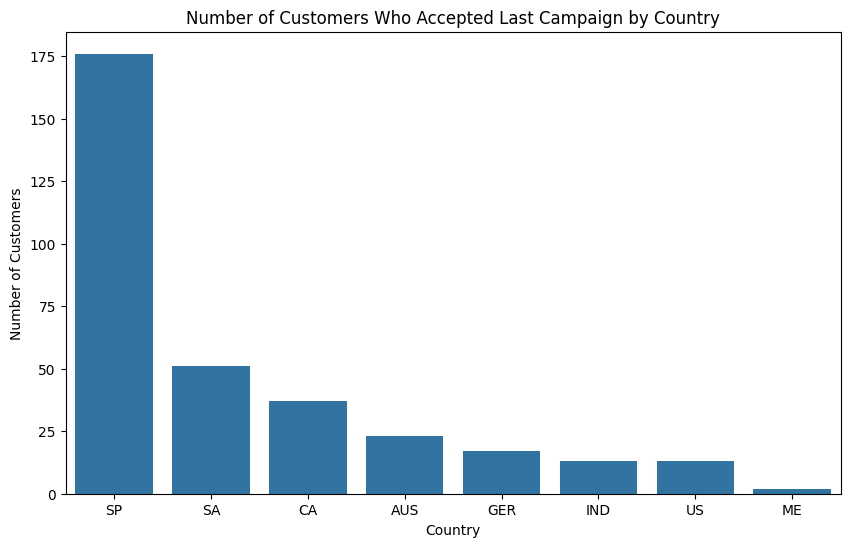

In [52]:
#C.Determine the country with the highest number of customers who accepted the last campaign.
accepted_customers_by_country = marketingdf[marketingdf['Response'] == 1]['Country'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=accepted_customers_by_country.index, y=accepted_customers_by_country.values)
plt.title('Number of Customers Who Accepted Last Campaign by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.show()


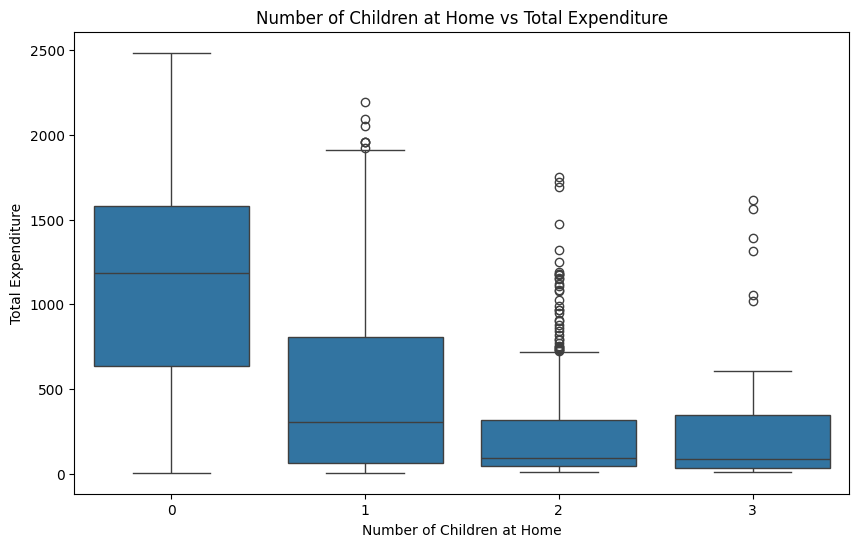

In [53]:
#D.Investigate if there is a discernible pattern in the number of children at home and the total expenditure.
marketingdf['Total_Expenditure'] = marketingdf[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Children', y='Total_Expenditure', data=marketingdf)
plt.title('Number of Children at Home vs Total Expenditure')
plt.xlabel('Number of Children at Home')
plt.ylabel('Total Expenditure')
plt.show()

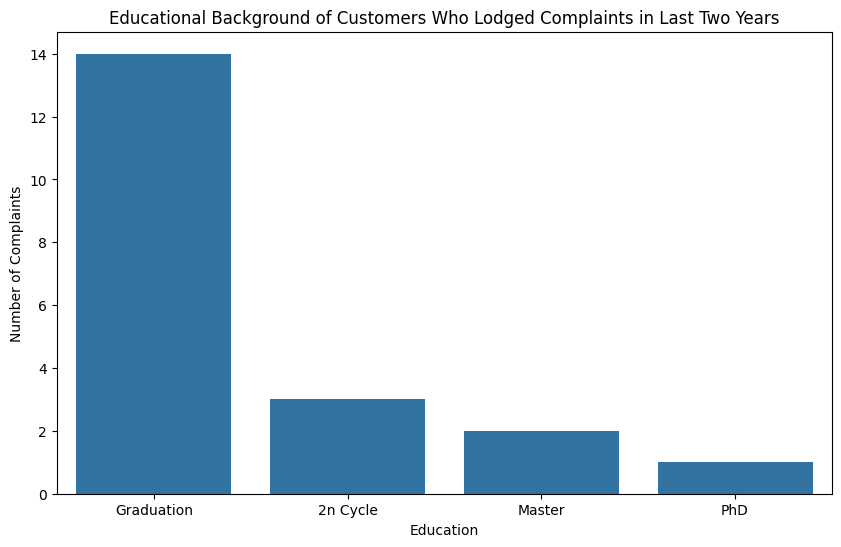

In [54]:
#e.	Analyze the educational background of customers who lodged complaints in the last two years.
complaints_by_education = marketingdf[marketingdf['Complain'] == 1]['Education'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=complaints_by_education.index, y=complaints_by_education.values)
plt.title('Educational Background of Customers Who Lodged Complaints in Last Two Years')
plt.xlabel('Education')
plt.ylabel('Number of Complaints')
plt.show()